In [1]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

/home/wyz5rge/.local/lib/python3.6/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


## Set up parameters, create isochrone grid

In [12]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F162M', 'jwst,F182M']
filters = ['m_jwst_F162M', 'm_jwst_F182M']
iso_dir = 'isochrones/'
metallicity = 0

In [13]:
# read nbody data
path_to_data = '../../../../../storage/jfarias/Data/Orion/massive_clusters/M3000new/sigma0p1/fiducial/sfe_ff001/00/'
snapshot = Reader.read_snapshot(path_to_data, time = 20)

# convert snapshot values from nbody units to astrophysical, extract masses
snapshot.to_physical()

# read ages for simulated stars
cluster_table = converter.to_spicea_table(snapshot)

print(cluster_table)

masses = cluster_table['mass']
level_ages = cluster_table['age']

for i in range(len(level_ages)):
    level_ages[i] = level_ages[i] * 1e6

# convert log ages from log(Myr) to log(yr)
log_ages = np.log10(level_ages)

# print(log_ages)
print("Min log age = " + str(min(log_ages)))
print("Max log age = " + str(max(log_ages)))

# print(level_ages)
print("Min level age = " + str(min(level_ages)))
print("Max level age = " + str(max(level_ages)))

        mass         isMultiple ...       log_a               age        
-------------------- ---------- ... ------------------ ------------------
 0.06895842179945424        0.0 ...                nan  18.62630555946738
 0.08626887187757219        0.0 ...                nan  3.069082513027311
   2.326448478984193        0.0 ...                nan  18.33038253724003
 0.04093112166717806        0.0 ...                nan  3.069082513027311
 0.12120750486036917        0.0 ...                nan 3.8325701628119546
0.030672437361009684        0.0 ...                nan 3.8325701628119546
0.038397156098594086        0.0 ...                nan  11.41339149145218
  0.9778833957370643        0.0 ...                nan 16.112574745369784
 0.13641146028342271        0.0 ...                nan 16.149288533963723
 0.06032785968948606        0.0 ...                nan 16.149288533963723
                 ...        ... ...                ...                ...
  0.4204697137805375        1.0 ... 3.

In [14]:
start = (min(level_ages) // 0.5e6) * 0.5e6
end = (max(level_ages) // 0.5e6) * 0.5e6 + 2 * 0.5e6
increment = 0.5e6  # 500,000

# Create age arrays
level_age_arr = np.arange(start, end, increment)
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[6.39794001 6.47712125 6.54406804 6.60205999 6.65321251 6.69897
 6.74036269 6.77815125 6.81291336 6.84509804 6.87506126 6.90308999
 6.92941893 6.95424251 6.97772361 7.         7.0211893  7.04139269
 7.06069784 7.07918125 7.09691001 7.11394335 7.13033377 7.14612804
 7.161368   7.17609126 7.1903317  7.20411998 7.21748394 7.23044892
 7.24303805 7.25527251 7.26717173 7.2787536  7.29003461 7.30103
 7.31175386]
[ 2500000.  3000000.  3500000.  4000000.  4500000.  5000000.  5500000.
  6000000.  6500000.  7000000.  7500000.  8000000.  8500000.  9000000.
  9500000. 10000000. 10500000. 11000000. 11500000. 12000000. 12500000.
 13000000. 13500000. 14000000. 14500000. 15000000. 15500000. 16000000.
 16500000. 17000000. 17500000. 18000000. 18500000. 19000000. 19500000.
 20000000. 20500000.]


In [15]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

Changing to logg=4.50 for T= 39293 logg=4.00
Changing to logg=4.50 for T= 39737 logg=3.99
Changing to logg=4.50 for T= 40206 logg=3.98
Changing to logg=4.50 for T= 40487 logg=3.97
Changing to logg=4.50 for T= 40764 logg=3.97
Changing to logg=4.50 for T= 41036 logg=3.95
Changing to logg=4.50 for T= 41298 logg=3.94
Changing to logg=4.50 for T= 41548 logg=3.93
Changing to logg=4.50 for T= 41810 logg=3.92
Changing to logg=4.50 for T= 42053 logg=3.90
Changing to logg=4.50 for T= 42247 logg=3.88
Changing to logg=4.50 for T= 42389 logg=3.86
Changing to logg=4.50 for T= 42598 logg=3.83
Changing to logg=4.50 for T= 43046 logg=3.82
Changing to logg=4.50 for T= 44070 logg=3.81
Changing to logg=4.50 for T= 44382 logg=3.80
Changing to logg=4.50 for T= 44435 logg=3.80
Changing to logg=4.50 for T= 44490 logg=3.79
Changing to logg=4.50 for T= 44532 logg=3.78
Changing to T= 50000 for T= 55470 logg=4.05
Changing to logg=5.00 for T= 55470 logg=4.05
Changing to T= 50000 for T= 56402 logg=4.07
Changing to 

Changing to T= 50000 for T= 68089 logg=4.30
Changing to logg=5.00 for T= 68089 logg=4.30
Changing to T= 50000 for T= 68666 logg=4.32
Changing to logg=5.00 for T= 68666 logg=4.32
Changing to T= 50000 for T= 69275 logg=4.33
Changing to logg=5.00 for T= 69275 logg=4.33
Changing to T= 50000 for T= 69901 logg=4.35
Changing to logg=5.00 for T= 69901 logg=4.35
Changing to T= 50000 for T= 70543 logg=4.36
Changing to logg=5.00 for T= 70543 logg=4.36
Changing to T= 50000 for T= 71202 logg=4.38
Changing to logg=5.00 for T= 71202 logg=4.38
Changing to T= 50000 for T= 71872 logg=4.39
Changing to logg=5.00 for T= 71872 logg=4.39
Changing to T= 50000 for T= 72550 logg=4.41
Changing to logg=5.00 for T= 72550 logg=4.41
Changing to T= 50000 for T= 73235 logg=4.42
Changing to logg=5.00 for T= 73235 logg=4.42
Changing to T= 50000 for T= 73926 logg=4.44
Changing to logg=5.00 for T= 73926 logg=4.44
Changing to T= 50000 for T= 74623 logg=4.45
Changing to logg=5.00 for T= 74623 logg=4.45
Changing to T= 50000 

Changing to T= 50000 for T=112597 logg=5.09
Changing to logg=5.00 for T=112597 logg=5.09
Changing to T= 50000 for T=112587 logg=5.09
Changing to logg=5.00 for T=112587 logg=5.09
Changing to T= 50000 for T=112576 logg=5.09
Changing to logg=5.00 for T=112576 logg=5.09
Changing to T= 50000 for T=112564 logg=5.09
Changing to logg=5.00 for T=112564 logg=5.09
Changing to T= 50000 for T=112551 logg=5.09
Changing to logg=5.00 for T=112551 logg=5.09
Changing to T= 50000 for T=112538 logg=5.09
Changing to logg=5.00 for T=112538 logg=5.09
Changing to T= 50000 for T=112524 logg=5.09
Changing to logg=5.00 for T=112524 logg=5.09
Changing to T= 50000 for T=112509 logg=5.09
Changing to logg=5.00 for T=112509 logg=5.09
Changing to T= 50000 for T=112494 logg=5.09
Changing to logg=5.00 for T=112494 logg=5.09
Changing to T= 50000 for T=112477 logg=5.09
Changing to logg=5.00 for T=112477 logg=5.09
Changing to T= 50000 for T=112460 logg=5.08
Changing to logg=5.00 for T=112460 logg=5.08
Changing to T= 50000 

Changing to T= 50000 for T=110065 logg=5.02
Changing to logg=5.00 for T=110065 logg=5.02
Changing to T= 50000 for T=110034 logg=5.02
Changing to logg=5.00 for T=110034 logg=5.02
Changing to T= 50000 for T=110003 logg=5.02
Changing to logg=5.00 for T=110003 logg=5.02
Changing to T= 50000 for T=109972 logg=5.02
Changing to logg=5.00 for T=109972 logg=5.02
Changing to T= 50000 for T=109942 logg=5.02
Changing to logg=5.00 for T=109942 logg=5.02
Changing to T= 50000 for T=109912 logg=5.01
Changing to logg=5.00 for T=109912 logg=5.01
Changing to T= 50000 for T=109882 logg=5.01
Changing to logg=5.00 for T=109882 logg=5.01
Changing to T= 50000 for T=109852 logg=5.01
Changing to logg=5.00 for T=109852 logg=5.01
Changing to T= 50000 for T=109823 logg=5.01
Changing to logg=5.00 for T=109823 logg=5.01
Changing to T= 50000 for T=109795 logg=5.01
Changing to logg=5.00 for T=109795 logg=5.01
Changing to T= 50000 for T=109767 logg=5.01
Changing to logg=5.00 for T=109767 logg=5.01
Changing to T= 50000 

Changing to logg=4.00 for T= 35119 logg=4.00
Changing to logg=4.00 for T= 35444 logg=3.99
Changing to logg=4.00 for T= 35762 logg=3.98
Changing to logg=4.00 for T= 36158 logg=3.96
Changing to logg=4.00 for T= 36596 logg=3.94
Changing to logg=4.00 for T= 36831 logg=3.93
Changing to logg=4.00 for T= 37051 logg=3.92
Changing to logg=4.00 for T= 37222 logg=3.90
Changing to logg=4.00 for T= 37366 logg=3.89
Changing to logg=4.00 for T= 37483 logg=3.87
Changing to logg=4.00 for T= 37567 logg=3.85
Changing to logg=4.00 for T= 37806 logg=3.83
Changing to logg=4.00 for T= 37901 logg=3.81
Changing to logg=4.00 for T= 37907 logg=3.79
Changing to logg=4.00 for T= 37889 logg=3.77
Changing to logg=4.00 for T= 37847 logg=3.76
Changing to logg=4.00 for T= 37778 logg=3.74
Changing to logg=4.00 for T= 37685 logg=3.72
Changing to logg=4.00 for T= 37566 logg=3.70
Changing to logg=4.00 for T= 37422 logg=3.68
Changing to logg=4.00 for T= 37255 logg=3.65
Changing to logg=4.00 for T= 37063 logg=3.63
Changing t

Changing to T= 50000 for T=103649 logg=4.99
Changing to logg=5.00 for T=103649 logg=4.99
Changing to T= 50000 for T=103602 logg=4.99
Changing to logg=5.00 for T=103602 logg=4.99
Changing to T= 50000 for T=103554 logg=4.99
Changing to logg=5.00 for T=103554 logg=4.99
Changing to T= 50000 for T=103507 logg=4.98
Changing to logg=5.00 for T=103507 logg=4.98
Changing to T= 50000 for T=103459 logg=4.98
Changing to logg=5.00 for T=103459 logg=4.98
Changing to T= 50000 for T=103412 logg=4.98
Changing to logg=5.00 for T=103412 logg=4.98
Changing to T= 50000 for T=103359 logg=4.98
Changing to logg=5.00 for T=103359 logg=4.98
Changing to T= 50000 for T=103300 logg=4.98
Changing to logg=5.00 for T=103300 logg=4.98
Changing to T= 50000 for T=103241 logg=4.97
Changing to logg=5.00 for T=103241 logg=4.97
Changing to T= 50000 for T=103182 logg=4.97
Changing to logg=5.00 for T=103182 logg=4.97
Changing to T= 50000 for T=103123 logg=4.97
Changing to logg=5.00 for T=103123 logg=4.97
Changing to T= 50000 

Changing to T= 50000 for T= 96697 logg=4.80
Changing to logg=5.00 for T= 96697 logg=4.80
Changing to T= 50000 for T= 96614 logg=4.80
Changing to logg=5.00 for T= 96614 logg=4.80
Changing to T= 50000 for T= 96531 logg=4.80
Changing to logg=5.00 for T= 96531 logg=4.80
Changing to T= 50000 for T= 96447 logg=4.79
Changing to logg=5.00 for T= 96447 logg=4.79
Changing to T= 50000 for T= 96364 logg=4.79
Changing to logg=5.00 for T= 96364 logg=4.79
Changing to T= 50000 for T= 96281 logg=4.79
Changing to logg=5.00 for T= 96281 logg=4.79
Changing to T= 50000 for T= 96198 logg=4.79
Changing to logg=5.00 for T= 96198 logg=4.79
Changing to T= 50000 for T= 96114 logg=4.79
Changing to logg=5.00 for T= 96114 logg=4.79
Changing to T= 50000 for T= 96031 logg=4.78
Changing to logg=5.00 for T= 96031 logg=4.78
Changing to T= 50000 for T= 95948 logg=4.78
Changing to logg=5.00 for T= 95948 logg=4.78
Changing to T= 50000 for T= 95865 logg=4.78
Changing to logg=5.00 for T= 95865 logg=4.78
Changing to T= 50000 

Changing to T= 50000 for T=133226 logg=5.46
Changing to logg=5.00 for T=133226 logg=5.46
Changing to T= 50000 for T=133153 logg=5.46
Changing to logg=5.00 for T=133153 logg=5.46
Changing to T= 50000 for T=133177 logg=5.46
Changing to logg=5.00 for T=133177 logg=5.46
Changing to T= 50000 for T=133221 logg=5.47
Changing to logg=5.00 for T=133221 logg=5.47
Changing to T= 50000 for T=133256 logg=5.47
Changing to logg=5.00 for T=133256 logg=5.47
Changing to T= 50000 for T=133279 logg=5.47
Changing to logg=5.00 for T=133279 logg=5.47
Changing to T= 50000 for T=133307 logg=5.48
Changing to logg=5.00 for T=133307 logg=5.48
Changing to T= 50000 for T=133291 logg=5.48
Changing to logg=5.00 for T=133291 logg=5.48
Changing to T= 50000 for T=133265 logg=5.48
Changing to logg=5.00 for T=133265 logg=5.48
Changing to T= 50000 for T=133216 logg=5.48
Changing to logg=5.00 for T=133216 logg=5.48
Changing to T= 50000 for T=133177 logg=5.48
Changing to logg=5.00 for T=133177 logg=5.48
Changing to T= 50000 

Changing to T= 50000 for T=194772 logg=6.04
Changing to logg=5.00 for T=194772 logg=6.04
Changing to T= 50000 for T=195696 logg=6.05
Changing to logg=5.00 for T=195696 logg=6.05
Changing to T= 50000 for T=196624 logg=6.05
Changing to logg=5.00 for T=196624 logg=6.05
Changing to T= 50000 for T=197551 logg=6.06
Changing to logg=5.00 for T=197551 logg=6.06
Changing to T= 50000 for T=198482 logg=6.07
Changing to logg=5.00 for T=198482 logg=6.07
Changing to T= 50000 for T=199408 logg=6.07
Changing to logg=5.00 for T=199408 logg=6.07
Changing to T= 50000 for T=200334 logg=6.08
Changing to logg=5.00 for T=200334 logg=6.08
Changing to T= 50000 for T=201252 logg=6.08
Changing to logg=5.00 for T=201252 logg=6.08
Changing to T= 50000 for T=202167 logg=6.09
Changing to logg=5.00 for T=202167 logg=6.09
Changing to T= 50000 for T=203074 logg=6.10
Changing to logg=5.00 for T=203074 logg=6.10
Changing to T= 50000 for T=203967 logg=6.10
Changing to logg=5.00 for T=203967 logg=6.10
Changing to T= 50000 

Changing to logg=4.00 for T= 31859 logg=3.31
Changing to logg=4.00 for T= 31561 logg=3.28
Changing to logg=4.00 for T= 31261 logg=3.26
Changing to logg=3.50 for T= 30959 logg=3.23
Changing to logg=3.50 for T= 30657 logg=3.21
Changing to logg=3.50 for T= 30355 logg=3.19
Changing to logg=3.50 for T= 30052 logg=3.16
Changing to logg=3.50 for T= 29749 logg=3.14
Changing to logg=3.50 for T= 29447 logg=3.12
Changing to logg=3.50 for T= 29146 logg=3.10
Changing to logg=3.50 for T= 28846 logg=3.07
Changing to logg=3.50 for T= 28547 logg=3.05
Changing to logg=3.50 for T= 28249 logg=3.03
Changing to logg=3.50 for T= 27953 logg=3.00
Changing to logg=3.50 for T= 27659 logg=2.98
Changing to logg=3.50 for T= 27367 logg=2.96
Changing to logg=3.50 for T= 27078 logg=2.93
Changing to logg=3.50 for T= 26792 logg=2.91
Changing to logg=3.50 for T= 26512 logg=2.89
Changing to logg=3.50 for T= 26250 logg=2.87
Changing to logg=3.50 for T= 26032 logg=2.85
Changing to logg=3.00 for T= 25824 logg=2.83
Changing t

Changing to logg=2.00 for T=  9664 logg=1.02
Changing to logg=2.00 for T=  9600 logg=1.01
Changing to logg=2.00 for T=  9537 logg=1.00
Changing to logg=2.00 for T=  9474 logg=0.99
Changing to logg=2.00 for T=  9411 logg=0.98
Changing to logg=2.00 for T=  9348 logg=0.97
Changing to logg=2.00 for T=  9287 logg=0.96
Changing to logg=2.00 for T=  9225 logg=0.94
Changing to logg=2.00 for T=  9164 logg=0.93
Changing to logg=2.00 for T=  9103 logg=0.92
Changing to logg=2.00 for T=  9043 logg=0.91
Changing to logg=1.50 for T=  8983 logg=0.90
Changing to logg=1.50 for T=  8923 logg=0.89
Changing to logg=1.50 for T=  8864 logg=0.87
Changing to logg=1.50 for T=  8806 logg=0.86
Changing to logg=1.50 for T=  8747 logg=0.85
Changing to logg=1.50 for T=  8690 logg=0.84
Changing to logg=1.50 for T=  8632 logg=0.83
Changing to logg=1.50 for T=  8575 logg=0.82
Changing to logg=1.50 for T=  8518 logg=0.80
Changing to logg=1.50 for T=  8462 logg=0.79
Changing to logg=1.50 for T=  8406 logg=0.78
Changing t

Changing to T= 50000 for T=178673 logg=5.79
Changing to logg=5.00 for T=178673 logg=5.79
Changing to T= 50000 for T=179649 logg=5.80
Changing to logg=5.00 for T=179649 logg=5.80
Changing to T= 50000 for T=180629 logg=5.81
Changing to logg=5.00 for T=180629 logg=5.81
Changing to T= 50000 for T=181614 logg=5.82
Changing to logg=5.00 for T=181614 logg=5.82
Changing to T= 50000 for T=182604 logg=5.83
Changing to logg=5.00 for T=182604 logg=5.83
Changing to T= 50000 for T=183597 logg=5.84
Changing to logg=5.00 for T=183597 logg=5.84
Changing to T= 50000 for T=184594 logg=5.84
Changing to logg=5.00 for T=184594 logg=5.84
Changing to T= 50000 for T=185595 logg=5.85
Changing to logg=5.00 for T=185595 logg=5.85
Changing to T= 50000 for T=186600 logg=5.86
Changing to logg=5.00 for T=186600 logg=5.86
Changing to T= 50000 for T=187608 logg=5.87
Changing to logg=5.00 for T=187608 logg=5.87
Changing to T= 50000 for T=188619 logg=5.88
Changing to logg=5.00 for T=188619 logg=5.88
Changing to T= 50000 

M =   2.409 Msun  T = 10007 K  m_jwst_F162M = 8.89
M =   7.159 Msun  T = 20933 K  m_jwst_F162M = 7.26
M =  49.655 Msun  T = 29749 K  m_jwst_F162M = 1.99
M =  56.931 Msun  T = 16123 K  m_jwst_F162M = -0.25
M =  56.978 Msun  T =  8296 K  m_jwst_F162M = -2.30
M =  64.399 Msun  T = 68333 K  m_jwst_F162M = 4.12
M =  69.710 Msun  T = 223651 K  m_jwst_F162M = 9.33
Starting filter: jwst,F182M   Elapsed time: 16.13 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  2998 K  m_jwst_F182M = 14.19
M =   2.409 Msun  T = 10007 K  m_jwst_F182M = 8.90
M =   7.159 Msun  T = 20933 K  m_jwst_F182M = 7.31
M =  49.655 Msun  T = 29749 K  m_jwst_F182M = 2.05
M =  56.931 Msun  T = 16123 K  m_jwst_F182M = -0.22
M =  56.978 Msun  T =  8296 K  m_jwst_F182M = -2.29
M =  64.399 Msun  T = 68333 K  m_jwst_F182M = 4.18
M =  69.710 Msun  T = 223651 K  m_jwst_F182M = 9.40
      Time taken: 32.62 seconds
Changing to logg=4.00 for T= 32444 logg=3.99
Changing to logg=4.00 for T= 32684 logg=3.98
Changing to logg=4

Changing to logg=2.50 for T= 12800 logg=1.61
Changing to logg=2.50 for T= 12691 logg=1.60
Changing to logg=2.50 for T= 12584 logg=1.58
Changing to logg=2.50 for T= 12477 logg=1.57
Changing to logg=2.50 for T= 12371 logg=1.55
Changing to logg=2.50 for T= 12266 logg=1.54
Changing to logg=2.50 for T= 12162 logg=1.52
Changing to logg=2.50 for T= 12059 logg=1.51
Changing to logg=2.50 for T= 11956 logg=1.49
Changing to logg=2.50 for T= 11855 logg=1.48
Changing to logg=2.50 for T= 11754 logg=1.46
Changing to logg=2.00 for T= 11654 logg=1.45
Changing to logg=2.00 for T= 11556 logg=1.44
Changing to logg=2.00 for T= 11457 logg=1.42
Changing to logg=2.00 for T= 11360 logg=1.41
Changing to logg=2.00 for T= 11264 logg=1.39
Changing to logg=2.00 for T= 11168 logg=1.38
Changing to logg=2.00 for T= 11073 logg=1.36
Changing to logg=2.00 for T= 10979 logg=1.35
Changing to logg=2.00 for T= 10886 logg=1.33
Changing to logg=2.00 for T= 10794 logg=1.32
Changing to logg=2.00 for T= 10702 logg=1.30
Changing t

Changing to T= 50000 for T=107728 logg=4.97
Changing to logg=5.00 for T=107728 logg=4.97
Changing to T= 50000 for T=108209 logg=4.97
Changing to logg=5.00 for T=108209 logg=4.97
Changing to T= 50000 for T=108703 logg=4.98
Changing to logg=5.00 for T=108703 logg=4.98
Changing to T= 50000 for T=109198 logg=4.99
Changing to logg=5.00 for T=109198 logg=4.99
Changing to T= 50000 for T=109693 logg=4.99
Changing to logg=5.00 for T=109693 logg=4.99
Changing to T= 50000 for T=110185 logg=5.00
Changing to logg=5.00 for T=110185 logg=5.00
Changing to T= 50000 for T=110678 logg=5.00
Changing to logg=5.00 for T=110678 logg=5.00
Changing to T= 50000 for T=111171 logg=5.01
Changing to logg=5.00 for T=111171 logg=5.01
Changing to T= 50000 for T=111665 logg=5.02
Changing to logg=5.00 for T=111665 logg=5.02
Changing to T= 50000 for T=112160 logg=5.02
Changing to logg=5.00 for T=112160 logg=5.02
Changing to T= 50000 for T=112656 logg=5.03
Changing to logg=5.00 for T=112656 logg=5.03
Changing to T= 50000 

M =   0.107 Msun  T =  3003 K  m_jwst_F162M = 14.20
M =   2.306 Msun  T =  9312 K  m_jwst_F162M = 9.03
M =   7.092 Msun  T = 20808 K  m_jwst_F162M = 7.27
M =  42.523 Msun  T = 28376 K  m_jwst_F162M = 2.14
M =  46.065 Msun  T = 15044 K  m_jwst_F162M = -0.10
M =  46.118 Msun  T =  6418 K  m_jwst_F162M = -2.72
M =  50.747 Msun  T = 38771 K  m_jwst_F162M = 2.39
M =  53.670 Msun  T = 130667 K  m_jwst_F162M = 7.26
Starting filter: jwst,F182M   Elapsed time: 15.94 seconds
Starting synthetic photometry
M =   0.107 Msun  T =  3003 K  m_jwst_F182M = 14.27
M =   2.306 Msun  T =  9312 K  m_jwst_F182M = 9.03
M =   7.092 Msun  T = 20808 K  m_jwst_F182M = 7.32
M =  42.523 Msun  T = 28376 K  m_jwst_F182M = 2.20
M =  46.065 Msun  T = 15044 K  m_jwst_F182M = -0.07
M =  46.118 Msun  T =  6418 K  m_jwst_F182M = -2.73
M =  50.747 Msun  T = 38771 K  m_jwst_F182M = 2.45
M =  53.670 Msun  T = 130667 K  m_jwst_F182M = 7.33
      Time taken: 31.39 seconds
Changing to logg=4.00 for T= 31490 logg=3.99
Changing to

Changing to logg=2.50 for T= 13691 logg=1.77
Changing to logg=2.50 for T= 13584 logg=1.76
Changing to logg=2.50 for T= 13477 logg=1.74
Changing to logg=2.50 for T= 13371 logg=1.73
Changing to logg=2.50 for T= 13266 logg=1.72
Changing to logg=2.50 for T= 13162 logg=1.70
Changing to logg=2.50 for T= 13058 logg=1.69
Changing to logg=2.50 for T= 12955 logg=1.67
Changing to logg=2.50 for T= 12854 logg=1.66
Changing to logg=2.50 for T= 12753 logg=1.65
Changing to logg=2.50 for T= 12652 logg=1.63
Changing to logg=2.50 for T= 12553 logg=1.62
Changing to logg=2.50 for T= 12454 logg=1.61
Changing to logg=2.50 for T= 12356 logg=1.59
Changing to logg=2.50 for T= 12259 logg=1.58
Changing to logg=2.50 for T= 12162 logg=1.56
Changing to logg=2.50 for T= 12067 logg=1.55
Changing to logg=2.50 for T= 11972 logg=1.54
Changing to logg=2.50 for T= 11878 logg=1.52
Changing to logg=2.50 for T= 11784 logg=1.51
Changing to logg=2.00 for T= 11691 logg=1.49
Changing to logg=2.00 for T= 11600 logg=1.48
Changing t

Changing to logg=2.50 for T= 15334 logg=1.66
Changing to logg=2.50 for T= 15320 logg=1.66
Changing to logg=2.50 for T= 15307 logg=1.65
Changing to logg=2.50 for T= 15295 logg=1.65
Changing to logg=2.50 for T= 15287 logg=1.65
Changing to logg=2.50 for T= 15282 logg=1.64
Changing to logg=2.50 for T= 15279 logg=1.64
Changing to logg=2.50 for T= 15277 logg=1.64
Changing to logg=2.50 for T= 15311 logg=1.64
Changing to logg=2.50 for T= 15333 logg=1.64
Changing to logg=2.50 for T= 15320 logg=1.63
Changing to logg=2.50 for T= 15307 logg=1.62
Changing to logg=2.50 for T= 15303 logg=1.62
Changing to logg=2.50 for T= 15307 logg=1.62
Changing to logg=2.50 for T= 15317 logg=1.61
Changing to logg=2.50 for T= 15333 logg=1.61
Changing to logg=2.50 for T= 15349 logg=1.62
Changing to logg=2.50 for T= 15366 logg=1.62
Changing to logg=2.50 for T= 15385 logg=1.62
Changing to logg=2.50 for T= 15401 logg=1.62
Changing to logg=2.50 for T= 15404 logg=1.62
Changing to logg=2.50 for T= 15416 logg=1.62
Changing t

Changing to logg=4.00 for T= 31128 logg=3.33
Changing to logg=3.50 for T= 30907 logg=3.32
Changing to logg=3.50 for T= 30674 logg=3.31
Changing to logg=3.50 for T= 30437 logg=3.30
Changing to logg=3.50 for T= 30196 logg=3.28
Changing to logg=3.50 for T= 29950 logg=3.27
Changing to logg=3.50 for T= 29703 logg=3.25
Changing to logg=3.50 for T= 29464 logg=3.23
Changing to logg=3.50 for T= 29230 logg=3.22
Changing to logg=3.50 for T= 28997 logg=3.20
Changing to logg=3.50 for T= 28766 logg=3.18
Changing to logg=3.50 for T= 28549 logg=3.16
Changing to logg=3.50 for T= 28333 logg=3.14
Changing to logg=3.50 for T= 28116 logg=3.12
Changing to logg=3.50 for T= 27908 logg=3.11
Changing to logg=3.50 for T= 27712 logg=3.09
Changing to logg=3.50 for T= 27527 logg=3.08
Changing to logg=3.50 for T= 27339 logg=3.07
Changing to logg=3.50 for T= 27135 logg=3.05
Changing to logg=3.50 for T= 26923 logg=3.04
Changing to logg=3.50 for T= 26708 logg=3.03
Changing to logg=3.50 for T= 26495 logg=3.01
Changing t

Changing to logg=2.00 for T=  9108 logg=1.12
Changing to logg=2.00 for T=  9046 logg=1.11
Changing to logg=1.50 for T=  8968 logg=1.09
Changing to logg=1.50 for T=  8891 logg=1.07
Changing to logg=1.50 for T=  8813 logg=1.06
Changing to logg=1.50 for T=  8737 logg=1.04
Changing to logg=1.50 for T=  8660 logg=1.03
Changing to logg=1.50 for T=  8584 logg=1.01
Changing to logg=1.50 for T=  8509 logg=1.00
Changing to logg=1.50 for T=  8434 logg=0.98
Changing to logg=1.50 for T=  8359 logg=0.97
Changing to logg=1.50 for T=  8285 logg=0.95
Changing to logg=1.00 for T=  8212 logg=0.94
Changing to logg=1.00 for T=  8138 logg=0.92
Changing to logg=1.00 for T=  8065 logg=0.90
Changing to logg=1.00 for T=  7992 logg=0.89
Changing to logg=1.00 for T=  7920 logg=0.87
Changing to logg=1.00 for T=  7848 logg=0.86
Changing to logg=1.00 for T=  7776 logg=0.84
Changing to logg=1.00 for T=  7704 logg=0.82
Changing to logg=1.00 for T=  7633 logg=0.81
Changing to logg=1.00 for T=  7560 logg=0.79
Changing t

Changing to logg=2.00 for T=  9981 logg=0.99
Changing to logg=2.00 for T=  9984 logg=0.99
Changing to logg=2.00 for T=  9987 logg=0.99
Changing to logg=2.00 for T=  9990 logg=0.99
Changing to logg=2.00 for T=  9992 logg=0.99
Changing to logg=2.00 for T=  9994 logg=0.99
Changing to logg=2.00 for T=  9996 logg=0.99
Changing to logg=2.00 for T=  9998 logg=0.99
Changing to logg=2.00 for T=  9999 logg=0.99
Changing to logg=2.00 for T=  9999 logg=0.99
Changing to logg=2.00 for T=  9999 logg=0.99
Changing to logg=2.00 for T=  9997 logg=0.99
Changing to logg=2.00 for T=  9996 logg=0.99
Changing to logg=2.00 for T=  9995 logg=0.99
Isochrone generation took 54.951915 s.
Making photometry for isochrone: log(t) = 6.74  AKs = 0.00  dist = 410
     Starting at:  2023-11-25 02:43:01.345610   Usually takes ~5 minutes
Starting filter: jwst,F162M   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  2986 K  m_jwst_F162M = 14.46
M =   2.128 Msun  T =  8751 K  m_jwst_F162M = 9.

Changing to logg=2.50 for T= 17631 logg=2.34
Changing to logg=2.50 for T= 17520 logg=2.33
Changing to logg=2.50 for T= 17411 logg=2.31
Changing to logg=2.50 for T= 17301 logg=2.30
Changing to logg=2.50 for T= 17193 logg=2.29
Changing to logg=2.50 for T= 17085 logg=2.28
Changing to logg=2.50 for T= 16978 logg=2.27
Changing to logg=2.50 for T= 16871 logg=2.26
Changing to logg=2.50 for T= 16765 logg=2.25
Changing to logg=2.50 for T= 16660 logg=2.24
Changing to logg=2.50 for T= 16555 logg=2.23
Changing to logg=2.50 for T= 16451 logg=2.21
Changing to logg=2.50 for T= 16347 logg=2.20
Changing to logg=2.50 for T= 16244 logg=2.19
Changing to logg=2.50 for T= 16142 logg=2.18
Changing to logg=2.50 for T= 16041 logg=2.17
Changing to logg=2.50 for T= 15939 logg=2.16
Changing to logg=2.50 for T= 15839 logg=2.15
Changing to logg=2.50 for T= 15739 logg=2.14
Changing to logg=2.50 for T= 15640 logg=2.12
Changing to logg=2.50 for T= 15541 logg=2.11
Changing to logg=2.50 for T= 15443 logg=2.10
Changing t

Changing to logg=0.50 for T=  6220 logg=0.21
Changing to logg=0.50 for T=  6255 logg=0.22
Changing to logg=0.50 for T=  6289 logg=0.22
Changing to logg=0.50 for T=  6325 logg=0.22
Changing to logg=0.50 for T=  6361 logg=0.23
Changing to logg=0.50 for T=  6396 logg=0.23
Changing to logg=0.50 for T=  6432 logg=0.24
Changing to logg=0.50 for T=  6468 logg=0.24
Changing to logg=0.50 for T=  6505 logg=0.25
Changing to logg=0.50 for T=  6541 logg=0.25
Changing to logg=0.50 for T=  6579 logg=0.26
Changing to logg=0.50 for T=  6613 logg=0.27
Changing to logg=0.50 for T=  6645 logg=0.27
Changing to logg=0.50 for T=  6673 logg=0.28
Changing to logg=0.50 for T=  6702 logg=0.29
Changing to logg=0.50 for T=  6723 logg=0.30
Changing to logg=0.50 for T=  6742 logg=0.30
Changing to logg=0.50 for T=  6762 logg=0.31
Changing to logg=0.50 for T=  6780 logg=0.31
Changing to logg=0.50 for T=  6797 logg=0.32
Changing to logg=0.50 for T=  6814 logg=0.33
Changing to logg=0.50 for T=  6829 logg=0.33
Changing t

Changing to logg=3.00 for T= 20702 logg=2.68
Changing to logg=3.00 for T= 20566 logg=2.67
Changing to logg=3.00 for T= 20431 logg=2.66
Changing to logg=3.00 for T= 20296 logg=2.65
Changing to logg=3.00 for T= 20162 logg=2.63
Changing to logg=3.00 for T= 20029 logg=2.62
Changing to logg=3.00 for T= 19897 logg=2.61
Changing to logg=3.00 for T= 19766 logg=2.60
Changing to logg=3.00 for T= 19635 logg=2.59
Changing to logg=3.00 for T= 19505 logg=2.57
Changing to logg=3.00 for T= 19376 logg=2.56
Changing to logg=3.00 for T= 19247 logg=2.55
Changing to logg=3.00 for T= 19120 logg=2.54
Changing to logg=2.50 for T= 18617 logg=2.49
Changing to logg=2.50 for T= 18493 logg=2.48
Changing to logg=2.50 for T= 18370 logg=2.47
Changing to logg=2.50 for T= 18247 logg=2.46
Changing to logg=2.50 for T= 18126 logg=2.44
Changing to logg=2.50 for T= 18005 logg=2.43
Changing to logg=2.50 for T= 17885 logg=2.42
Changing to logg=2.50 for T= 17765 logg=2.41
Changing to logg=2.50 for T= 17647 logg=2.40
Changing t

Changing to logg=3.50 for T= 26839 logg=3.31
Changing to logg=3.50 for T= 26746 logg=3.29
Changing to logg=3.50 for T= 26654 logg=3.28
Changing to logg=3.50 for T= 26563 logg=3.27
Changing to logg=3.50 for T= 26477 logg=3.26
Changing to logg=3.50 for T= 26397 logg=3.25
Changing to logg=3.50 for T= 26334 logg=3.24
Changing to logg=3.50 for T= 26306 logg=3.24
Changing to logg=3.50 for T= 26345 logg=3.23
Changing to logg=3.50 for T= 26439 logg=3.24
Changing to logg=3.50 for T= 26551 logg=3.24
Changing to logg=3.50 for T= 26669 logg=3.25
Changing to logg=3.50 for T= 26789 logg=3.25
Changing to logg=3.50 for T= 26910 logg=3.26
Changing to logg=3.50 for T= 27032 logg=3.26
Changing to logg=3.50 for T= 27155 logg=3.27
Changing to logg=3.50 for T= 27277 logg=3.28
Changing to logg=3.50 for T= 27400 logg=3.28
Changing to logg=3.50 for T= 27523 logg=3.29
Changing to logg=3.50 for T= 27646 logg=3.30
Changing to logg=3.50 for T= 27768 logg=3.30
Changing to logg=3.50 for T= 27890 logg=3.31
Changing t

Changing to logg=2.00 for T=  9667 logg=1.36
Changing to logg=2.00 for T=  9608 logg=1.35
Changing to logg=2.00 for T=  9549 logg=1.34
Changing to logg=2.00 for T=  9491 logg=1.33
Changing to logg=2.00 for T=  9432 logg=1.32
Changing to logg=2.00 for T=  9374 logg=1.31
Changing to logg=2.00 for T=  9316 logg=1.29
Changing to logg=2.00 for T=  9258 logg=1.28
Changing to logg=2.00 for T=  9201 logg=1.27
Changing to logg=2.00 for T=  9144 logg=1.26
Changing to logg=2.00 for T=  9086 logg=1.25
Changing to logg=2.00 for T=  9029 logg=1.24
Changing to logg=1.50 for T=  8972 logg=1.23
Changing to logg=1.50 for T=  8916 logg=1.22
Changing to logg=1.50 for T=  8859 logg=1.21
Changing to logg=1.50 for T=  8803 logg=1.19
Changing to logg=1.50 for T=  8747 logg=1.18
Changing to logg=1.50 for T=  8690 logg=1.17
Changing to logg=1.50 for T=  8634 logg=1.16
Changing to logg=1.50 for T=  8578 logg=1.15
Changing to logg=1.50 for T=  8522 logg=1.14
Changing to logg=1.50 for T=  8466 logg=1.12
Changing t

Changing to logg=2.50 for T= 14934 logg=2.18
Changing to logg=2.50 for T= 14831 logg=2.17
Changing to logg=2.50 for T= 14728 logg=2.16
Changing to logg=2.50 for T= 14625 logg=2.15
Changing to logg=2.50 for T= 14524 logg=2.13
Changing to logg=2.50 for T= 14423 logg=2.12
Changing to logg=2.50 for T= 14323 logg=2.11
Changing to logg=2.50 for T= 14224 logg=2.10
Changing to logg=2.50 for T= 14125 logg=2.08
Changing to logg=2.50 for T= 14027 logg=2.07
Changing to logg=2.50 for T= 13930 logg=2.06
Changing to logg=2.50 for T= 13833 logg=2.05
Changing to logg=2.50 for T= 13737 logg=2.03
Changing to logg=2.50 for T= 13642 logg=2.02
Changing to logg=2.50 for T= 13547 logg=2.01
Changing to logg=2.50 for T= 13453 logg=1.99
Changing to logg=2.50 for T= 13359 logg=1.98
Changing to logg=2.50 for T= 13267 logg=1.97
Changing to logg=2.50 for T= 13174 logg=1.96
Changing to logg=2.50 for T= 13083 logg=1.94
Changing to logg=2.50 for T= 12992 logg=1.93
Changing to logg=2.50 for T= 12902 logg=1.92
Changing t

Changing to logg=3.00 for T= 21265 logg=2.86
Changing to logg=3.00 for T= 21131 logg=2.85
Changing to logg=3.00 for T= 20998 logg=2.84
Changing to logg=3.00 for T= 20866 logg=2.83
Changing to logg=3.00 for T= 20735 logg=2.82
Changing to logg=3.00 for T= 20604 logg=2.81
Changing to logg=3.00 for T= 20474 logg=2.79
Changing to logg=3.00 for T= 20344 logg=2.78
Changing to logg=3.00 for T= 20215 logg=2.77
Changing to logg=3.00 for T= 20087 logg=2.76
Changing to logg=3.00 for T= 19960 logg=2.75
Changing to logg=3.00 for T= 19833 logg=2.74
Changing to logg=3.00 for T= 19708 logg=2.73
Changing to logg=3.00 for T= 19582 logg=2.71
Changing to logg=3.00 for T= 19458 logg=2.70
Changing to logg=3.00 for T= 19334 logg=2.69
Changing to logg=3.00 for T= 19211 logg=2.68
Changing to logg=3.00 for T= 19089 logg=2.67
Changing to logg=2.50 for T= 17329 logg=2.49
Changing to logg=2.50 for T= 17217 logg=2.48
Changing to logg=2.50 for T= 17105 logg=2.47
Changing to logg=2.50 for T= 16993 logg=2.46
Changing t

Changing to logg=3.50 for T= 28411 logg=3.42
Changing to logg=3.50 for T= 28440 logg=3.43
Changing to logg=3.50 for T= 28447 logg=3.43
Changing to logg=3.50 for T= 28406 logg=3.43
Changing to logg=3.50 for T= 28320 logg=3.42
Changing to logg=3.50 for T= 28204 logg=3.42
Changing to logg=3.50 for T= 28070 logg=3.41
Changing to logg=3.50 for T= 27925 logg=3.41
Changing to logg=3.50 for T= 27774 logg=3.40
Changing to logg=3.50 for T= 27617 logg=3.39
Changing to logg=3.50 for T= 27458 logg=3.39
Changing to logg=3.50 for T= 27297 logg=3.38
Changing to logg=3.50 for T= 27136 logg=3.36
Changing to logg=3.50 for T= 26977 logg=3.35
Changing to logg=3.50 for T= 26819 logg=3.34
Changing to logg=3.50 for T= 26665 logg=3.33
Changing to logg=3.50 for T= 26511 logg=3.32
Changing to logg=3.50 for T= 26359 logg=3.30
Changing to logg=3.50 for T= 26209 logg=3.29
Changing to logg=3.50 for T= 26062 logg=3.28
Changing to logg=3.00 for T= 22522 logg=2.99
Changing to logg=3.00 for T= 22382 logg=2.98
Changing t

Changing to logg=3.50 for T= 26887 logg=3.39
Changing to logg=3.50 for T= 26976 logg=3.40
Changing to logg=3.50 for T= 27064 logg=3.40
Changing to logg=3.50 for T= 27149 logg=3.40
Changing to logg=3.50 for T= 27231 logg=3.41
Changing to logg=3.50 for T= 27311 logg=3.41
Changing to logg=3.50 for T= 27388 logg=3.41
Changing to logg=3.50 for T= 27463 logg=3.42
Changing to logg=3.50 for T= 27535 logg=3.42
Changing to logg=3.50 for T= 27604 logg=3.42
Changing to logg=3.50 for T= 27669 logg=3.42
Changing to logg=3.50 for T= 27732 logg=3.43
Changing to logg=3.50 for T= 27790 logg=3.43
Changing to logg=3.50 for T= 27841 logg=3.43
Changing to logg=3.50 for T= 27882 logg=3.43
Changing to logg=3.50 for T= 27909 logg=3.43
Changing to logg=3.50 for T= 27917 logg=3.44
Changing to logg=3.50 for T= 27882 logg=3.44
Changing to logg=3.50 for T= 27803 logg=3.43
Changing to logg=3.50 for T= 27691 logg=3.43
Changing to logg=3.50 for T= 27561 logg=3.43
Changing to logg=3.50 for T= 27420 logg=3.42
Changing t

Changing to logg=3.50 for T= 26892 logg=3.41
Changing to logg=3.50 for T= 26969 logg=3.41
Changing to logg=3.50 for T= 27044 logg=3.42
Changing to logg=3.50 for T= 27117 logg=3.42
Changing to logg=3.50 for T= 27186 logg=3.42
Changing to logg=3.50 for T= 27253 logg=3.43
Changing to logg=3.50 for T= 27316 logg=3.43
Changing to logg=3.50 for T= 27376 logg=3.43
Changing to logg=3.50 for T= 27431 logg=3.43
Changing to logg=3.50 for T= 27478 logg=3.43
Changing to logg=3.50 for T= 27516 logg=3.44
Changing to logg=3.50 for T= 27538 logg=3.44
Changing to logg=3.50 for T= 27542 logg=3.44
Changing to logg=3.50 for T= 27500 logg=3.44
Changing to logg=3.50 for T= 27416 logg=3.44
Changing to logg=3.50 for T= 27301 logg=3.43
Changing to logg=3.50 for T= 27168 logg=3.43
Changing to logg=3.50 for T= 27025 logg=3.42
Changing to logg=3.50 for T= 26874 logg=3.42
Changing to logg=3.50 for T= 26716 logg=3.41
Changing to logg=3.50 for T= 26555 logg=3.40
Changing to logg=3.50 for T= 26390 logg=3.39
Changing t

Changing to logg=3.50 for T= 26162 logg=3.42
Changing to logg=3.00 for T= 21193 logg=3.00
Changing to logg=3.00 for T= 21051 logg=2.99
Changing to logg=3.00 for T= 20909 logg=2.97
Changing to logg=3.00 for T= 20768 logg=2.96
Changing to logg=3.00 for T= 20627 logg=2.95
Changing to logg=3.00 for T= 20486 logg=2.94
Changing to logg=3.00 for T= 20346 logg=2.93
Changing to logg=3.00 for T= 20207 logg=2.92
Changing to logg=3.00 for T= 20069 logg=2.90
Changing to logg=3.00 for T= 19931 logg=2.89
Changing to logg=3.00 for T= 19794 logg=2.88
Changing to logg=3.00 for T= 19657 logg=2.87
Changing to logg=3.00 for T= 19522 logg=2.85
Changing to logg=3.00 for T= 19387 logg=2.84
Changing to logg=3.00 for T= 19253 logg=2.83
Changing to logg=3.00 for T= 19119 logg=2.82
Changing to logg=2.50 for T= 15918 logg=2.49
Changing to logg=2.50 for T= 15805 logg=2.48
Changing to logg=2.50 for T= 15692 logg=2.47
Changing to logg=2.50 for T= 15580 logg=2.46
Changing to logg=2.50 for T= 15469 logg=2.44
Changing t

Changing to logg=2.50 for T= 12815 logg=2.14
Changing to logg=2.50 for T= 12722 logg=2.12
Changing to logg=2.50 for T= 12629 logg=2.11
Changing to logg=2.50 for T= 12537 logg=2.10
Changing to logg=2.50 for T= 12446 logg=2.08
Changing to logg=2.50 for T= 12356 logg=2.07
Changing to logg=2.50 for T= 12266 logg=2.06
Changing to logg=2.50 for T= 12176 logg=2.04
Changing to logg=2.50 for T= 12088 logg=2.03
Changing to logg=2.50 for T= 12000 logg=2.02
Changing to logg=2.50 for T= 11913 logg=2.00
Changing to logg=2.50 for T= 11826 logg=1.99
Changing to logg=2.00 for T= 11740 logg=1.98
Changing to logg=2.00 for T= 11655 logg=1.96
Changing to logg=2.00 for T= 11570 logg=1.95
Changing to logg=2.00 for T= 11486 logg=1.94
Changing to logg=2.00 for T= 11402 logg=1.92
Changing to logg=2.00 for T= 11319 logg=1.91
Changing to logg=2.00 for T= 11237 logg=1.90
Changing to logg=2.00 for T= 11156 logg=1.88
Changing to logg=2.00 for T= 11075 logg=1.87
Changing to logg=2.00 for T= 10994 logg=1.86
Changing t

M =  15.849 Msun  T = 24108 K  m_jwst_F162M = 4.12
M =  16.550 Msun  T = 19302 K  m_jwst_F162M = 3.05
M =  16.572 Msun  T =  9250 K  m_jwst_F162M = 0.68
Starting filter: jwst,F182M   Elapsed time: 12.83 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  2995 K  m_jwst_F182M = 15.07
M =   1.844 Msun  T =  8623 K  m_jwst_F182M = 9.89
M =   6.039 Msun  T = 18842 K  m_jwst_F182M = 7.56
M =  15.849 Msun  T = 24108 K  m_jwst_F182M = 4.17
M =  16.550 Msun  T = 19302 K  m_jwst_F182M = 3.09
M =  16.572 Msun  T =  9250 K  m_jwst_F182M = 0.69
      Time taken: 25.57 seconds
Changing to logg=3.50 for T= 26026 logg=3.47
Changing to logg=3.50 for T= 26066 logg=3.47
Changing to logg=3.50 for T= 26097 logg=3.47
Changing to logg=3.50 for T= 26115 logg=3.47
Changing to logg=3.50 for T= 26116 logg=3.47
Changing to logg=3.50 for T= 26100 logg=3.48
Changing to logg=3.50 for T= 26053 logg=3.48
Changing to logg=3.00 for T= 19931 logg=3.00
Changing to logg=3.00 for T= 19822 logg=2.99
Changing to log

Changing to logg=3.00 for T= 19023 logg=2.95
Changing to logg=2.50 for T= 13998 logg=2.40
Changing to logg=2.50 for T= 13182 logg=2.30
Changing to logg=2.50 for T= 12410 logg=2.19
Changing to logg=2.00 for T= 10994 logg=1.99
Changing to logg=2.00 for T= 10348 logg=1.88
Changing to logg=2.00 for T=  9741 logg=1.78
Changing to logg=2.00 for T=  9171 logg=1.68
Isochrone generation took 34.518497 s.
Making photometry for isochrone: log(t) = 7.10  AKs = 0.00  dist = 410
     Starting at:  2023-11-25 02:58:47.331811   Usually takes ~5 minutes
Starting filter: jwst,F162M   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  2997 K  m_jwst_F162M = 15.10
M =   1.816 Msun  T =  8474 K  m_jwst_F162M = 9.94
M =   5.994 Msun  T = 18720 K  m_jwst_F162M = 7.52
M =  14.695 Msun  T = 23203 K  m_jwst_F162M = 4.23
M =  15.157 Msun  T = 22495 K  m_jwst_F162M = 3.91
M =  15.169 Msun  T = 15776 K  m_jwst_F162M = 2.66
Starting filter: jwst,F182M   Elapsed time: 11.69 seconds
Start

M =   1.773 Msun  T =  8297 K  m_jwst_F162M = 9.99
M =   5.890 Msun  T = 18482 K  m_jwst_F162M = 7.53
M =  13.640 Msun  T = 22413 K  m_jwst_F162M = 4.36
M =  13.969 Msun  T = 12337 K  m_jwst_F162M = 2.24
M =  13.982 Msun  T =  3606 K  m_jwst_F162M = -1.00
Starting filter: jwst,F182M   Elapsed time: 11.91 seconds
Starting synthetic photometry
M =   0.100 Msun  T =  3000 K  m_jwst_F182M = 15.24
M =   1.773 Msun  T =  8297 K  m_jwst_F182M = 9.99
M =   5.890 Msun  T = 18482 K  m_jwst_F182M = 7.57
M =  13.640 Msun  T = 22413 K  m_jwst_F182M = 4.41
M =  13.969 Msun  T = 12337 K  m_jwst_F182M = 2.26
M =  13.982 Msun  T =  3606 K  m_jwst_F182M = -1.18
      Time taken: 23.53 seconds
Changing to logg=2.50 for T= 13657 logg=2.48
Changing to logg=2.50 for T= 13467 logg=2.46
Changing to logg=2.50 for T= 13279 logg=2.44
Changing to logg=2.50 for T= 13093 logg=2.41
Changing to logg=2.50 for T= 12911 logg=2.39
Changing to logg=2.50 for T= 12730 logg=2.37
Changing to logg=2.50 for T= 12552 logg=2.35
C

Changing to logg=2.00 for T=  9263 logg=1.93
Changing to logg=2.00 for T=  9132 logg=1.91
Changing to logg=2.00 for T=  9002 logg=1.89
Isochrone generation took 39.010259 s.
Making photometry for isochrone: log(t) = 7.22  AKs = 0.00  dist = 410
     Starting at:  2023-11-25 03:06:58.928792   Usually takes ~5 minutes
Starting filter: jwst,F162M   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  3016 K  m_jwst_F162M = 15.25
M =   1.760 Msun  T =  8255 K  m_jwst_F162M = 10.01
M =   5.868 Msun  T = 18376 K  m_jwst_F162M = 7.51
M =  12.441 Msun  T = 21433 K  m_jwst_F162M = 4.50
M =  12.547 Msun  T = 10687 K  m_jwst_F162M = 2.22
M =  12.567 Msun  T =  3556 K  m_jwst_F162M = -0.91
Starting filter: jwst,F182M   Elapsed time: 13.13 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  3016 K  m_jwst_F182M = 15.30
M =   1.760 Msun  T =  8255 K  m_jwst_F182M = 10.01
M =   5.868 Msun  T = 18376 K  m_jwst_F182M = 7.55
M =  12.441 Msun  T = 21433 K  m_jwst_F182M

M =  12.224 Msun  T =  3575 K  m_jwst_F162M = -0.75
Starting filter: jwst,F182M   Elapsed time: 13.72 seconds
Starting synthetic photometry
M =   0.103 Msun  T =  3013 K  m_jwst_F182M = 15.43
M =   1.703 Msun  T =  8040 K  m_jwst_F182M = 10.07
M =   5.709 Msun  T = 18030 K  m_jwst_F182M = 7.57
M =  11.463 Msun  T = 20907 K  m_jwst_F182M = 4.73
M =  11.525 Msun  T = 10167 K  m_jwst_F182M = 2.38
M =  11.547 Msun  T =  3575 K  m_jwst_F182M = -0.88
M =  12.224 Msun  T =  3575 K  m_jwst_F182M = -0.94
      Time taken: 27.06 seconds
Changing to logg=2.50 for T= 12437 logg=2.50
Changing to logg=2.50 for T= 12267 logg=2.48
Changing to logg=2.50 for T= 12099 logg=2.45
Changing to logg=2.50 for T= 11934 logg=2.43
Changing to logg=2.50 for T= 11771 logg=2.41
Changing to logg=2.00 for T=  9057 logg=1.99
Isochrone generation took 40.177656 s.
Making photometry for isochrone: log(t) = 7.29  AKs = 0.00  dist = 410
     Starting at:  2023-11-25 03:13:41.809796   Usually takes ~5 minutes
Starting filte

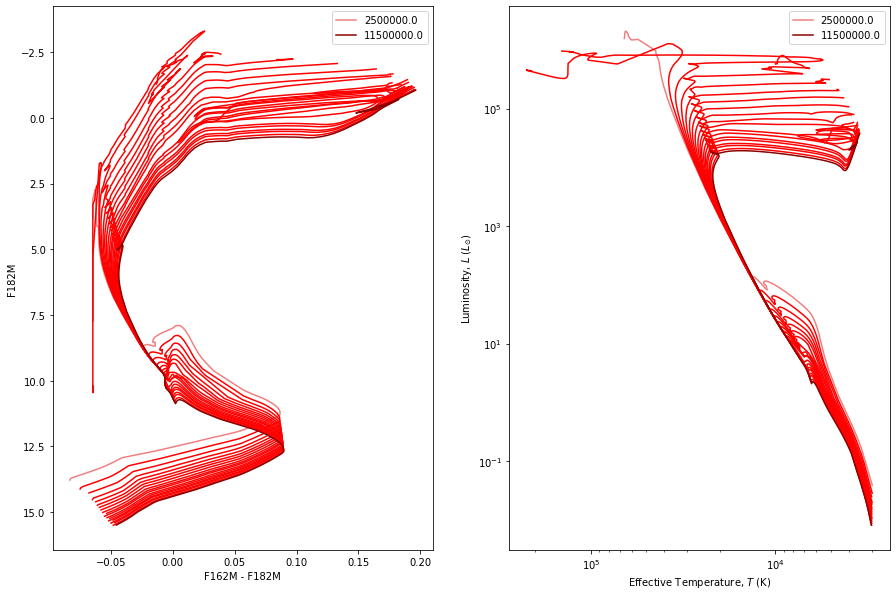

In [30]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))
if len(idx_arr) > 2:
    idx_arr = idx_arr[::2]

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F162M - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

# Plot HR
py.subplot(1, 2, 2)
watts_to_lsun = 1.0 / (3.846e26) # conversion factor for watts to Lsun
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    data_iso_Lsun = instances[idx].points['L'] * watts_to_lsun
    if i == 0:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'darkred', label=level_age_arr[i])
    else:    
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'red', label='')

py.xscale('log')
py.yscale('log')
py.xlabel('Effective Temperature, $T$ (K)')
py.ylabel('Luminosity, $L$ ($L_{\odot}$)')
py.gca().invert_xaxis()

py.legend()

In [24]:
import sys
sys.path.append('/scratch/wyz5rge/synthetic-hr')
import interpolator

level_ages_myr = level_ages / 1e6
# print(level_ages_myr)

# create array of stars
stars = np.empty(len(cluster_table), dtype=object)

# perform interpolation for each star
skip = [264, 334, 1822, 2863]
for i in range(len(stars)):
    if i in skip:
        continue
    # print(str(i) + " " + str(level_ages_myr[i]) + " " + str(masses[i]))
    stars[i] = interpolator.interpolate(level_ages_myr[i], masses[i], instances, log_age_arr, filters)

# convert luminosity values to solar luminosities
for i in range(len(stars)):
    if i in skip:
        continue
    stars[i][0] = stars[i][0] * watts_to_lsun

# print(stars)

['/scratch/wyz5rge/synthetic-hr/11-28/interpolation', '/scratch/wyz5rge/SPISEA', '/scratch/wyz5rge/TurbulentClusterModel', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/wyz5rge/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/home/jfarias/myCodes/ptools', '/home/jfarias/myCodes/nbody6tools', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/home/wyz5rge/.ipython', '/home/wyz5rge/.nbody6tools', '../', '/../', '/../../', '/../../', '/../../', '/scratch/wyz5rge/']


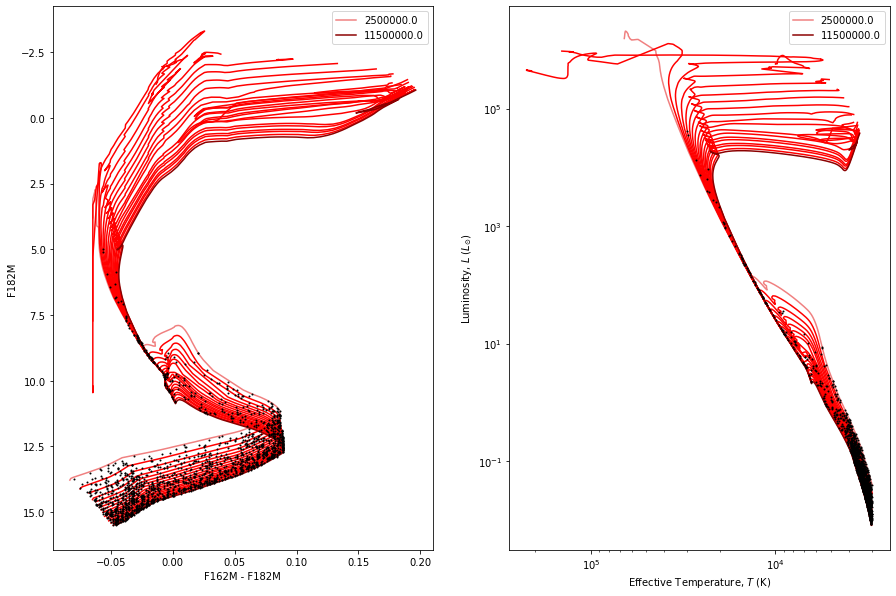

In [29]:
fig, axes = py.subplots(figsize=(15, 10))

# plot CMD
py.subplot(1, 2, 1)

for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F162M - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

for i in range(len(stars)):
    if i in skip or masses[i] < 0.1:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
    
py.xlabel('F162M - F182M')
py.ylabel('F182M')

# Plot HR
py.subplot(1, 2, 2)

for i in range(len(idx_arr)):
    idx = idx_arr[i]
    data_iso_Lsun = instances[idx].points['L'] * watts_to_lsun
    if i == 0:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'darkred', label=level_age_arr[i])
    else:    
        py.plot(instances[idx].points['Teff'], data_iso_Lsun, 'red', label='')

py.xscale('log')
py.yscale('log')
py.xlabel('Effective Temperature, $T$ (K)')
py.ylabel('Luminosity, $L$ ($L_{\odot}$)')
py.gca().invert_xaxis()

for i in range(len(stars)):
    if i in skip or masses[i] < 0.1:
        continue
    py.plot(stars[i][1], stars[i][0], marker='o', markersize=1, color='k')

py.legend()